<a href="https://colab.research.google.com/github/Hyuncastl/MACHINE_LEARNING/blob/main/12_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import urllib
import zipfile

url_train = "http://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
url_test = "http://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"

urllib.request.urlretrieve(url_train, 'horse-or-human.zip')
local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/horse-or-human')

urllib.request.urlretrieve(url_test, 'validation-horse-or-human.zip')
local_zip = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/validation-horse-or-human')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale=1/255.,
                                   horizontal_flip=True,
                                   rotation_range=35,
                                   zoom_range=0.2)
train_dir = '/content/validation-horse-or-human'

train_gen = image_generator.flow_from_directory(train_dir,
                                              batch_size=128,
                                              target_size=(300, 300),
                                              class_mode='binary')

Found 256 images belonging to 2 classes.


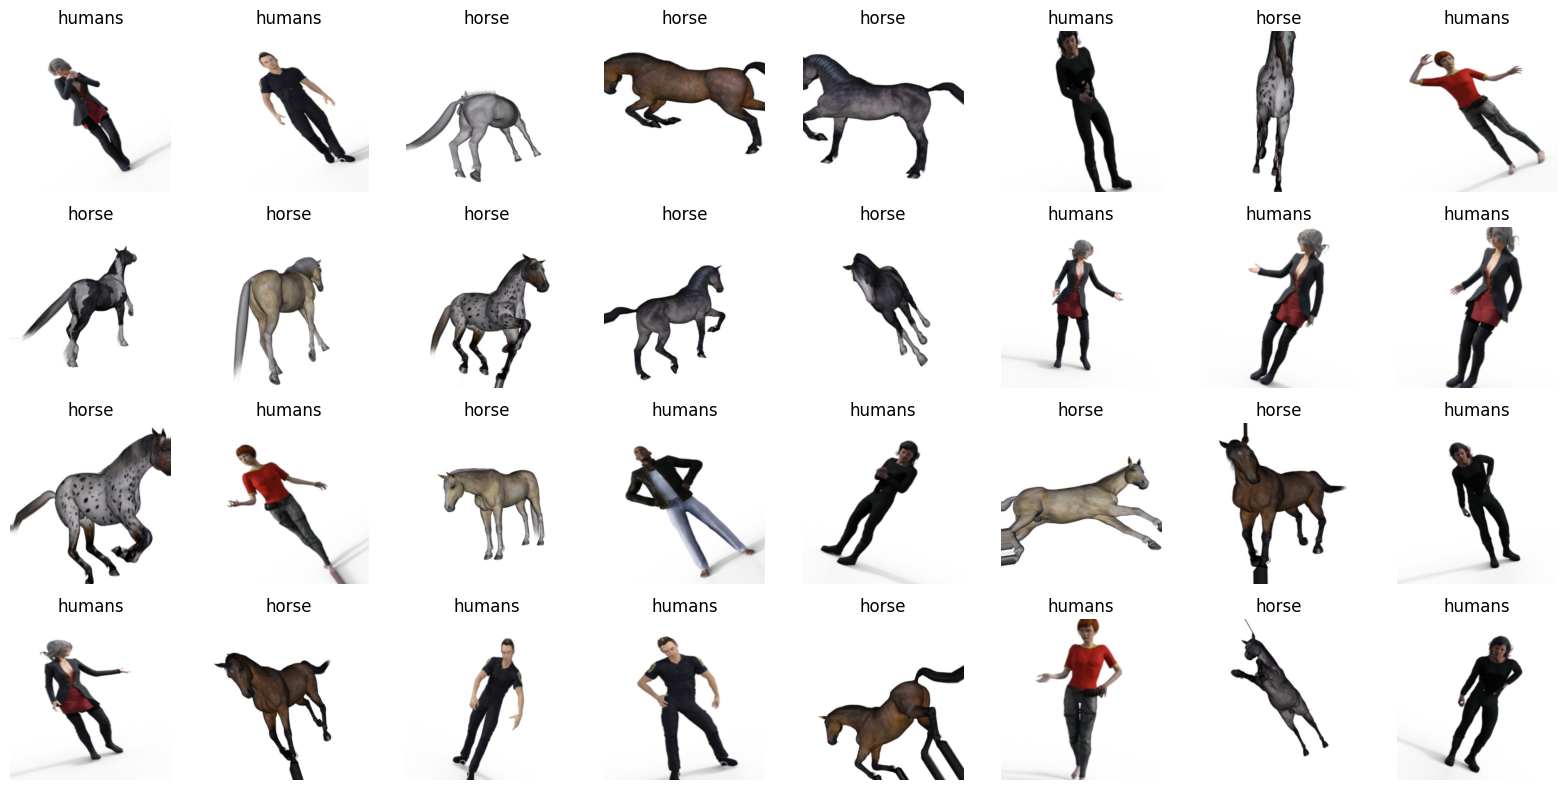

In [7]:
import numpy as np

class_labels = ['horse', 'humans']
batch = next(train_gen)
images, labels = batch[0], batch[1]

plt.figure(figsize=(16, 8))
for i in range(32):
    ax = plt.subplot(4, 8, i+1)
    plt.imshow(images[i])
    plt.title(class_labels[int(labels[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import urllib
import zipfile

url_train = "http://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
url_test = "http://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"

urllib.request.urlretrieve(url_train, 'horse-or-human.zip')
local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/horse-or-human')

urllib.request.urlretrieve(url_test, 'validation-horse-or-human.zip')
local_zip = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/validation-horse-or-human')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale=1/255.,
                                     horizontal_flip=True,
                                     rotation_range=35,
                                     zoom_range=0.2)
train_dir = '/content/horse-or-human'
valid_dir = '/content/validation-horse-or-human'

train_gen = image_generator.flow_from_directory(train_dir,
                                                batch_size=128,
                                                target_size=(300, 300),
                                                class_mode='binary')
valid_gen = image_generator.flow_from_directory(train_dir,
                                                batch_size=128,
                                                target_size=(300, 300),
                                                class_mode='binary')

def solution_model():
    model = tf.keras.Sequential([
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=RMSprop(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint_path = "my_checkpoint.ckpt"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                                 save_weights_only=True,
                                 save_best_only=True,
                                 monitor='val_loss',
                                 verbose=1)

    model.fit(train_gen, validation_data=valid_gen, epochs=10, callbacks=[checkpoint])

    model.load_weights(checkpoint_path)

    return model

if __name__ == '__main__':
    model = solution_model()
    model.save("TF3-horses-or-humans-type-A.h5")

Found 1027 images belonging to 2 classes.
Found 1027 images belonging to 2 classes.
Epoch 1/10
